In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
#autoreload
%load_ext autoreload
%autoreload 2

#DAB-SMOTE import
from classes.DAB_SMOTE import DAB_SMOTE

Examples per class after resample:  [1500  100   75   80]


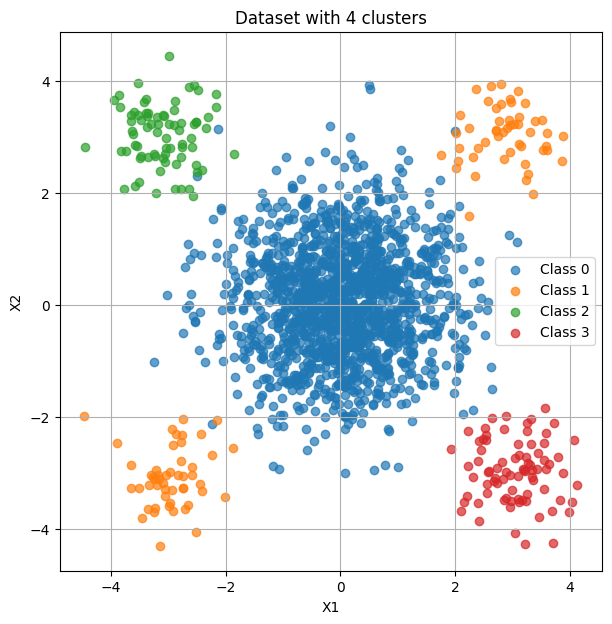

In [13]:
np.random.seed(42)

n_major = 1500

centers = [
    (0, 0),
    (3, 3),
    (-3, 3),
    (3, -3),
    (-3, -3)
]

X = []
y = []

X.append(np.random.normal(loc=centers[0], scale=1.0, size=(n_major, 2)))
y.append(np.zeros(n_major))

X.append(np.random.normal(loc=centers[1], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X.append(np.random.normal(loc=centers[2], scale=0.5, size=(75, 2)))
y.append(np.full(75, 2))

X.append(np.random.normal(loc=centers[3], scale=0.5, size=(80, 2)))
y.append(np.full(80, 3))

X.append(np.random.normal(loc=centers[4], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X = np.vstack(X)
y = np.hstack(y)

plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X[y == lbl, 0],
        X[y == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()


Examples per class after resample:  [1500 1500 1500 1500]


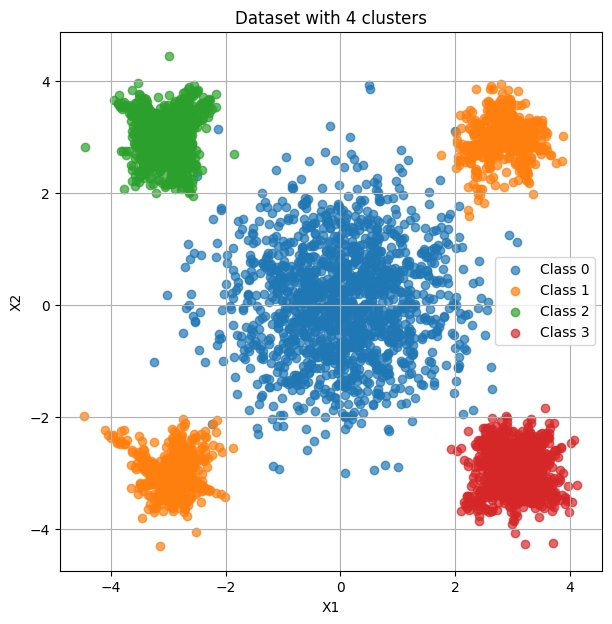

In [14]:
dab = DAB_SMOTE()
X_new, y_new =dab.fit_resample(X, y)
plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X_new[y_new == lbl, 0],
        X_new[y_new == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y_new, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

Examples per class after resample:  [1500  100   75   80]


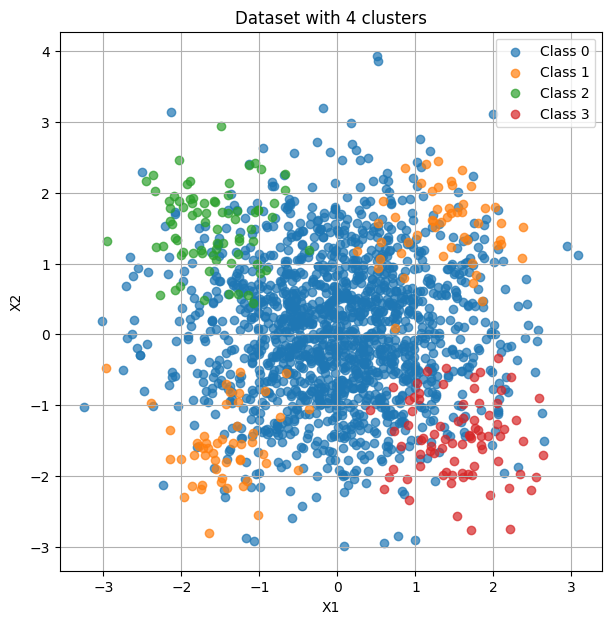

In [7]:
np.random.seed(42)

n_major = 1500

centers = [
    (0, 0),
    (1.5, 1.5),
    (-1.5, 1.5),
    (1.5, -1.5),
    (-1.5, -1.5)
]

X = []
y = []

X.append(np.random.normal(loc=centers[0], scale=1.0, size=(n_major, 2)))
y.append(np.zeros(n_major))

X.append(np.random.normal(loc=centers[1], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X.append(np.random.normal(loc=centers[2], scale=0.5, size=(75, 2)))
y.append(np.full(75, 2))

X.append(np.random.normal(loc=centers[3], scale=0.5, size=(80, 2)))
y.append(np.full(80, 3))

X.append(np.random.normal(loc=centers[4], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X = np.vstack(X)
y = np.hstack(y)

plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X[y == lbl, 0],
        X[y == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()


Examples per class after resample:  [1500 1500 1500 1500]


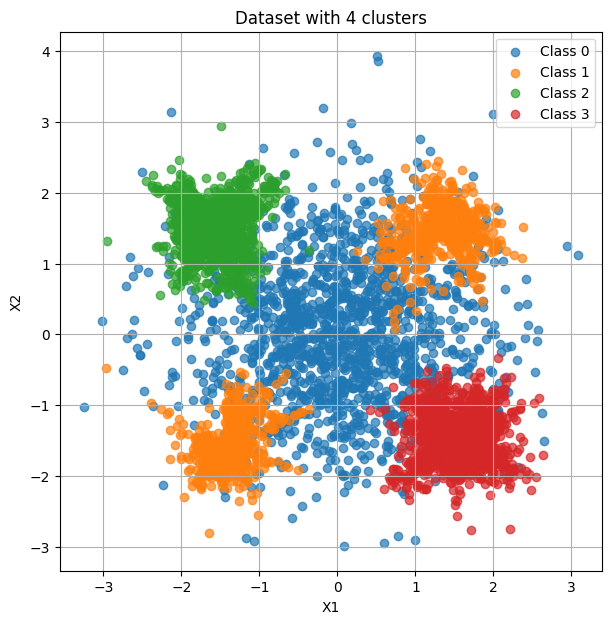

In [8]:
dab = DAB_SMOTE()
X_new, y_new =dab.fit_resample(X, y)
plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X_new[y_new == lbl, 0],
        X_new[y_new == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y_new, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier

pred = KNeighborsClassifier(3).fit(X, y).predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1500
         1.0       0.72      0.56      0.63       100
         2.0       0.75      0.65      0.70        75
         3.0       0.82      0.66      0.73        80

    accuracy                           0.92      1755
   macro avg       0.81      0.71      0.75      1755
weighted avg       0.91      0.92      0.91      1755



In [12]:
pred = KNeighborsClassifier(3).fit(X_new, y_new).predict(X_new)
print(classification_report(y_new, pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91      1500
         1.0       0.94      0.97      0.95      1500
         2.0       0.97      0.99      0.98      1500
         3.0       0.97      0.99      0.98      1500

    accuracy                           0.96      6000
   macro avg       0.95      0.96      0.95      6000
weighted avg       0.95      0.96      0.95      6000

